# Initial Data Pull and Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in CarPrice_Assignment csv dataset
df = pd.read_csv(r'C:\Users\rijaw\Downloads\car_price_prediction.csv')
print(df.shape)
df.head()


(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Look closer at the CarPrices dataset using describe() and info()
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Preprocessing


In [5]:
#When looking at the CarName column, you can see that the Manufacturer is at the beginning of the values. We want to extract this as a new column
Manufacturer = df['CarName'].apply(lambda x : x.split(' ')[0])
Manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
Manufacturer = Manufacturer.replace('maxda', 'mazda')
Manufacturer = Manufacturer.replace('Nissan', 'nissan')
Manufacturer = Manufacturer.replace('porcshce', 'porsche')
Manufacturer = Manufacturer.replace('toyouta', 'toyota')
Manufacturer = Manufacturer.replace('vokswagen', 'volkswagen')
Manufacturer = Manufacturer.replace('vw', 'volkswagen')
Manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
df.insert(1,'manufacturer',Manufacturer)
df.head()

,car_ID,manufacturer,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#Since there are so many unique Car Names compared to the overall size of the dataset, I will remove 'CarName' now that we have Manufacturer to be used instead.
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,manufacturer,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



# Exploratory Data Analysis (EDA)


<AxesSubplot:title={'center':'Price Distribution'}, xlabel='price', ylabel='Density'>

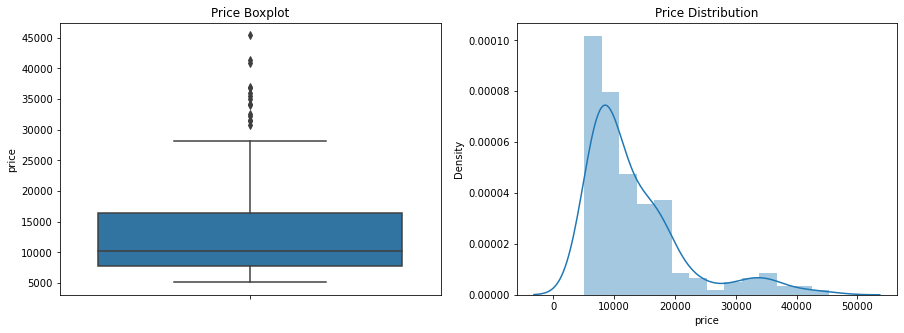

In [9]:
#Looking into the dependent variable "price"
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Price Boxplot')
sns.boxplot(y="price", data=df)

plt.subplot(1,2,2)
plt.title('Price Distribution')
sns.distplot(df["price"])


[Text(0, 0, 'alfa-romero'),
 Text(1, 0, 'audi'),
 Text(2, 0, 'bmw'),
 Text(3, 0, 'chevrolet'),
 Text(4, 0, 'dodge'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'isuzu'),
 Text(7, 0, 'jaguar'),
 Text(8, 0, 'mazda'),
 Text(9, 0, 'buick'),
 Text(10, 0, 'mercury'),
 Text(11, 0, 'mitsubishi'),
 Text(12, 0, 'nissan'),
 Text(13, 0, 'peugeot'),
 Text(14, 0, 'plymouth'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'renault'),
 Text(17, 0, 'saab'),
 Text(18, 0, 'subaru'),
 Text(19, 0, 'toyota'),
 Text(20, 0, 'volkswagen'),
 Text(21, 0, 'volvo')]

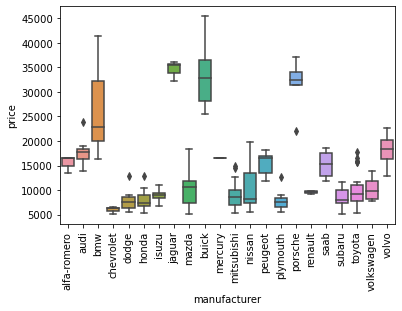

In [10]:
#Looking at how the different manufacturers compare with against their prices
ax  = sns.boxplot(x="manufacturer", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'alfa-romero'),
 Text(1, 0, 'audi'),
 Text(2, 0, 'bmw'),
 Text(3, 0, 'chevrolet'),
 Text(4, 0, 'dodge'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'isuzu'),
 Text(7, 0, 'jaguar'),
 Text(8, 0, 'mazda'),
 Text(9, 0, 'buick'),
 Text(10, 0, 'mercury'),
 Text(11, 0, 'mitsubishi'),
 Text(12, 0, 'nissan'),
 Text(13, 0, 'peugeot'),
 Text(14, 0, 'plymouth'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'renault'),
 Text(17, 0, 'saab'),
 Text(18, 0, 'subaru'),
 Text(19, 0, 'toyota'),
 Text(20, 0, 'volkswagen'),
 Text(21, 0, 'volvo')]

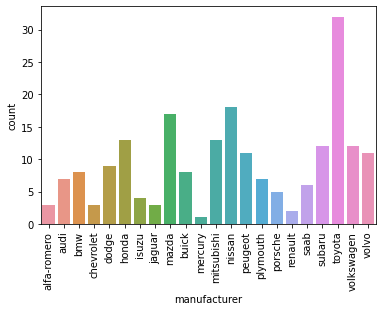

In [11]:
#Getting counts of each manufacturer as well
ax = sns.countplot(x="manufacturer", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Looking into the Categorical variables


In [12]:
df.select_dtypes(include=['object'])


,manufacturer,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


# Countplots


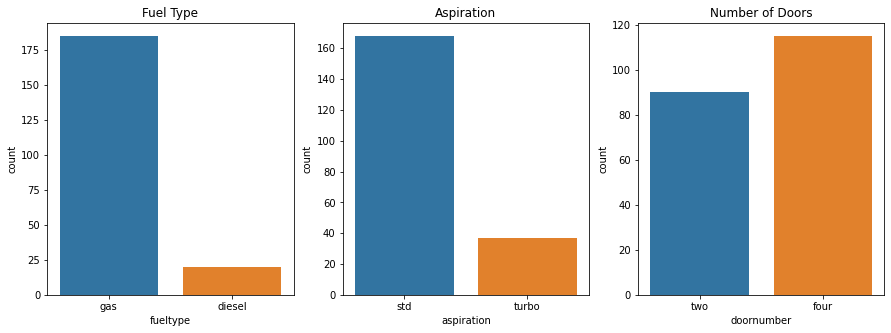

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Fuel Type')
sns.countplot(x="fueltype", data=df)

plt.subplot(1,3,2)
plt.title('Aspiration')
sns.countplot(x="aspiration", data=df)

plt.subplot(1,3,3)
plt.title('Number of Doors')
sns.countplot(x="doornumber", data=df)

plt.show()

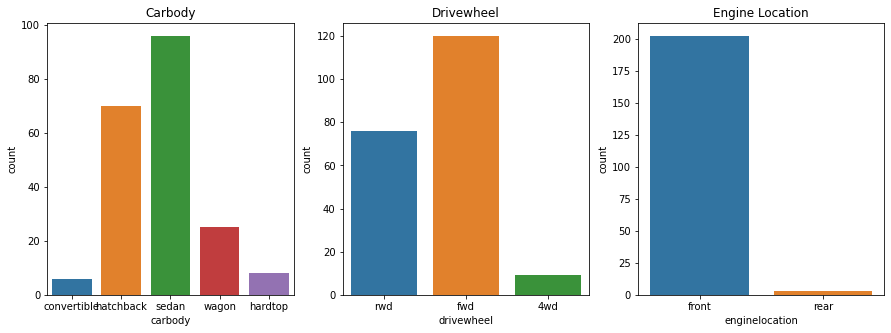

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Carbody')
sns.countplot(x="carbody", data=df)

plt.subplot(1,3,2)
plt.title('Drivewheel')
sns.countplot(x="drivewheel", data=df)

plt.subplot(1,3,3)
plt.title('Engine Location')
sns.countplot(x="enginelocation", data=df)

plt.show()

<AxesSubplot:title={'center':'Fuel System'}, xlabel='fuelsystem', ylabel='count'>

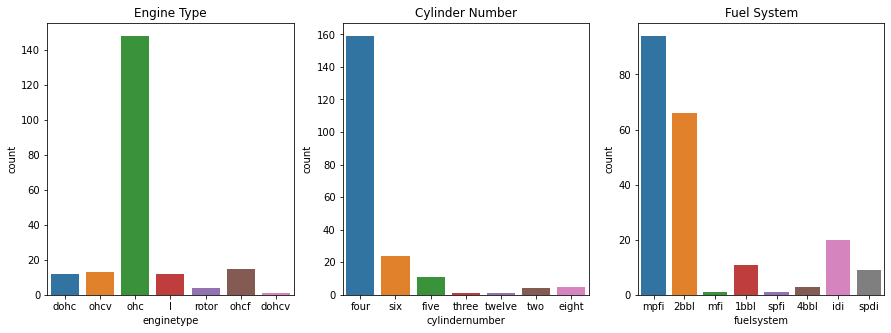

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Engine Type')
sns.countplot(x="enginetype", data=df)

plt.subplot(1,3,2)
plt.title('Cylinder Number')
sns.countplot(x="cylindernumber", data=df)

plt.subplot(1,3,3)
plt.title('Fuel System')
sns.countplot(x="fuelsystem", data=df)


# Boxplot

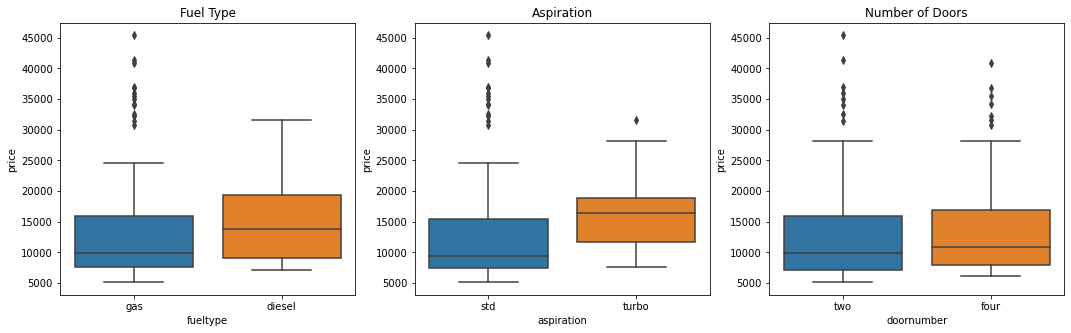

In [16]:

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.title('Fuel Type')
sns.boxplot(x="fueltype", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Aspiration')
sns.boxplot(x="aspiration", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Number of Doors')
sns.boxplot(x="doornumber", y="price", data=df)

plt.show()

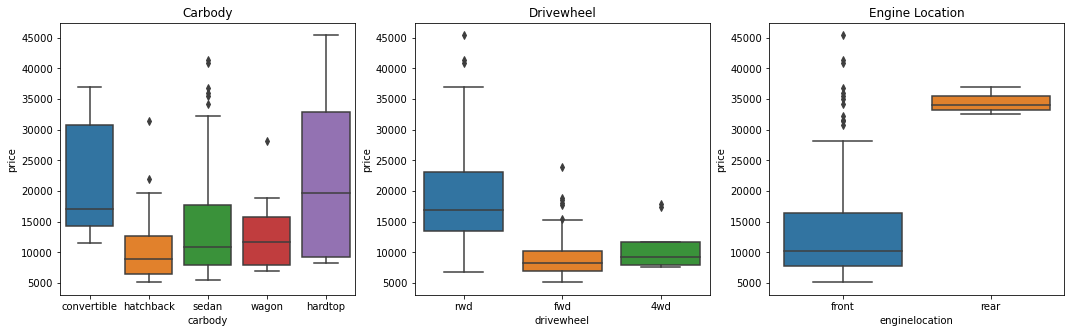

In [17]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.title('Carbody')
sns.boxplot(x="carbody", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Drivewheel')
sns.boxplot(x="drivewheel", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Engine Location')
sns.boxplot(x="enginelocation", y="price", data=df)

plt.show()

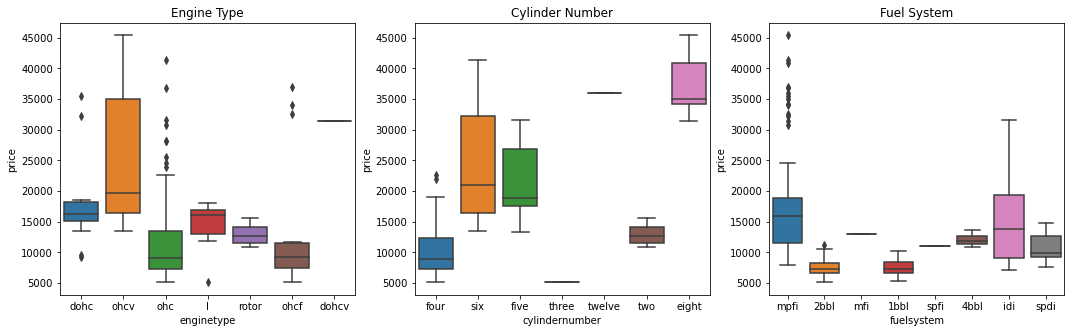

In [18]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.title('Engine Type')
sns.boxplot(x="enginetype", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Cylinder Number')
sns.boxplot(x="cylindernumber", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Fuel System')
sns.boxplot(x="fuelsystem", y="price", data=df)

plt.show()

# Looking into the Numerical variables


In [19]:
df.select_dtypes(include=['int64', 'float64'])


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:xlabel='symboling', ylabel='price'>

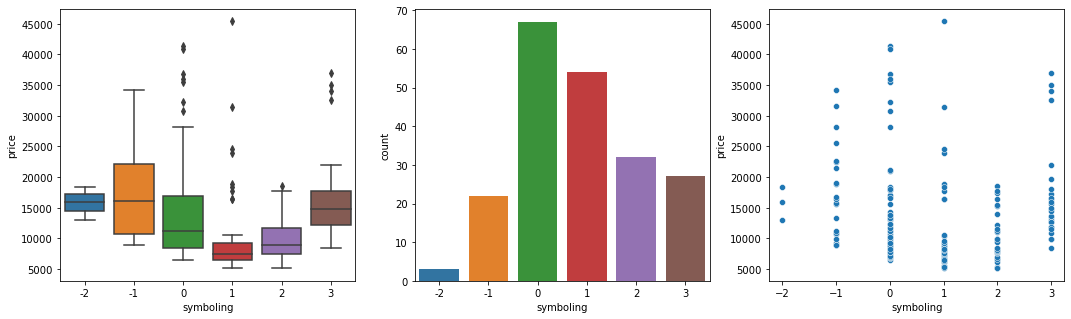

In [20]:
#Looking to understand the symboling variable
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(x="symboling", y="price", data=df)

plt.subplot(1,3,2)
sns.countplot(x="symboling", data=df)

plt.subplot(1,3,3)
sns.scatterplot(x="symboling", y="price", data=df)

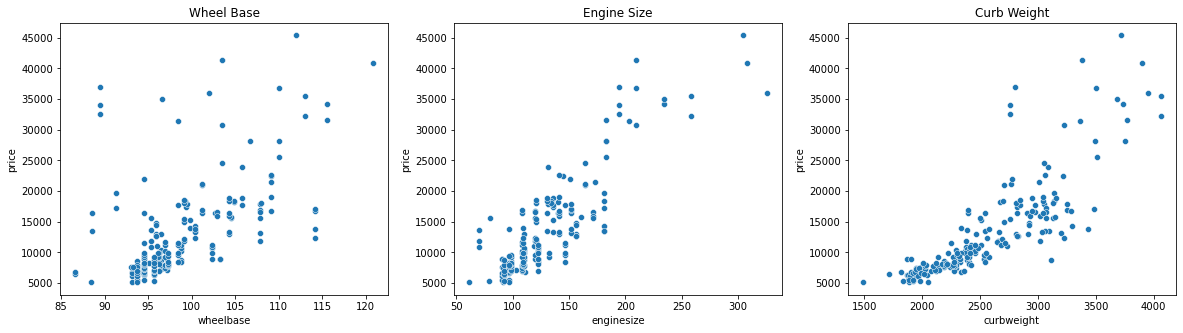

In [21]:
#Comparing the other numerical variables to price
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Wheel Base')
sns.scatterplot(x="wheelbase", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Engine Size')
sns.scatterplot(x="enginesize", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Curb Weight')
sns.scatterplot(x="curbweight", y="price", data=df)

plt.show()

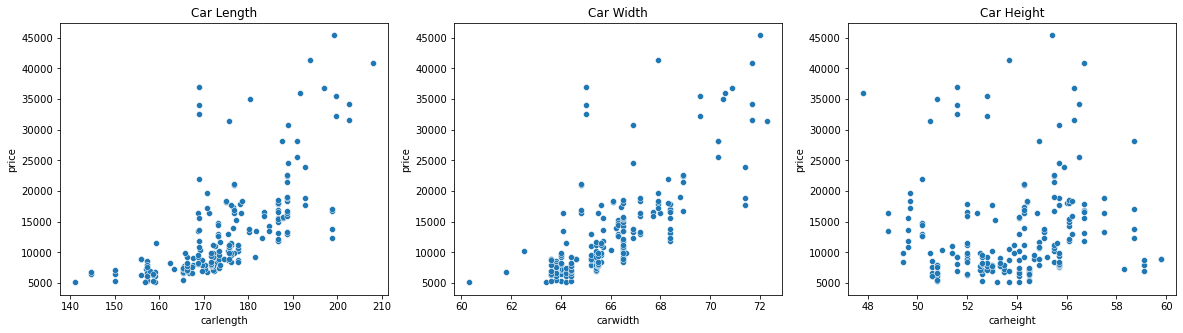

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Car Length')
sns.scatterplot(x="carlength", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Car Width')
sns.scatterplot(x="carwidth", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Car Height')
sns.scatterplot(x="carheight", y="price", data=df)

plt.show()

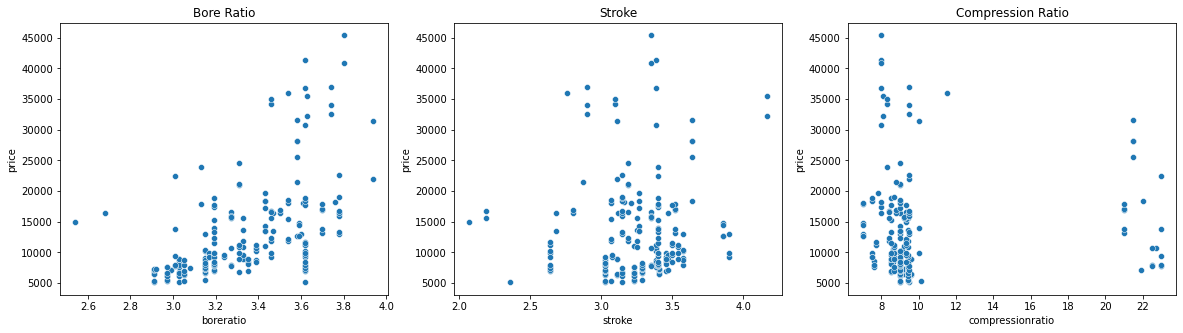

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Bore Ratio')
sns.scatterplot(x="boreratio", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Stroke')
sns.scatterplot(x="stroke", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Compression Ratio')
sns.scatterplot(x="compressionratio", y="price", data=df)

plt.show()


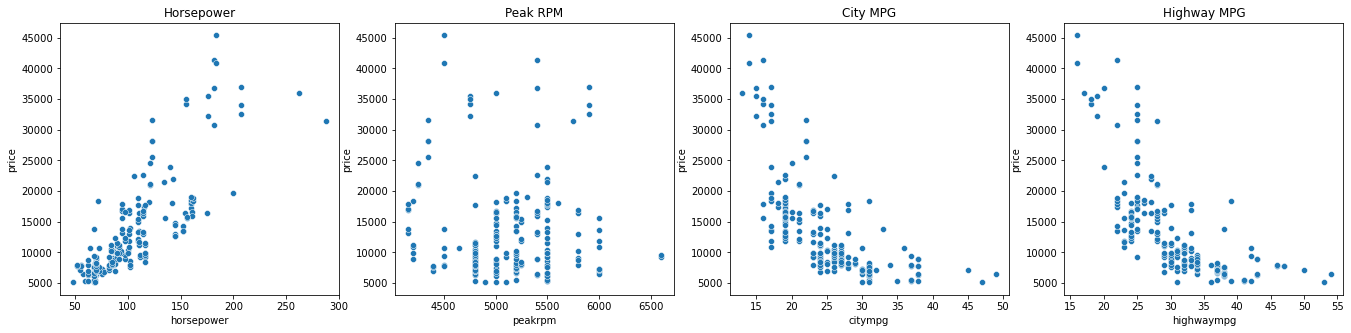

In [24]:
plt.figure(figsize=(23,5))

plt.subplot(1,4,1)
plt.title('Horsepower')
sns.scatterplot(x="horsepower", y="price", data=df)

plt.subplot(1,4,2)
plt.title('Peak RPM')
sns.scatterplot(x="peakrpm", y="price", data=df)

plt.subplot(1,4,3)
plt.title('City MPG')
sns.scatterplot(x="citympg", y="price", data=df)

plt.subplot(1,4,4)
plt.title('Highway MPG')
sns.scatterplot(x="highwaympg", y="price", data=df)

plt.show()

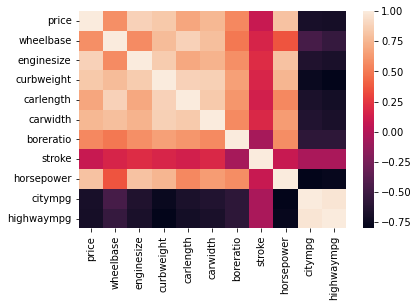

In [28]:
sns.heatmap(df[['price','wheelbase','enginesize','curbweight','carlength','carwidth','boreratio','stroke','horsepower','citympg','highwaympg']].corr())
plt.show()

In [29]:
#develop new variable
df["avgmpg"] = (df["citympg"]+df["highwaympg"])/2
df["avgmpg"].head(10)

0    24.0
1    24.0
2    22.5
3    27.0
4    20.0
5    22.0
6    22.0
7    22.0
8    18.5
9    19.0
Name: avgmpg, dtype: float64

# Restructure the Data


In [30]:
df_cars = df[['price', 'manufacturer', 'fueltype', 'aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','wheelbase','enginesize','curbweight','carlength','carwidth','boreratio','stroke','horsepower','avgmpg']]
df_cars

,price,manufacturer,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,enginesize,curbweight,carlength,carwidth,boreratio,stroke,horsepower,avgmpg
0,13495.0,alfa-romero,gas,std,convertible,rwd,dohc,four,mpfi,88.6,130,2548,168.8,64.1,3.47,2.68,111,24.0
1,16500.0,alfa-romero,gas,std,convertible,rwd,dohc,four,mpfi,88.6,130,2548,168.8,64.1,3.47,2.68,111,24.0
2,16500.0,alfa-romero,gas,std,hatchback,rwd,ohcv,six,mpfi,94.5,152,2823,171.2,65.5,2.68,3.47,154,22.5
3,13950.0,audi,gas,std,sedan,fwd,ohc,four,mpfi,99.8,109,2337,176.6,66.2,3.19,3.40,102,27.0
4,17450.0,audi,gas,std,sedan,4wd,ohc,five,mpfi,99.4,136,2824,176.6,66.4,3.19,3.40,115,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,volvo,gas,std,sedan,rwd,ohc,four,mpfi,109.1,141,2952,188.8,68.9,3.78,3.15,114,25.5
201,19045.0,volvo,gas,turbo,sedan,rwd,ohc,four,mpfi,109.1,141,3049,188.8,68.8,3.78,3.15,160,22.0
202,21485.0,volvo,gas,std,sedan,rwd,ohcv,six,mpfi,109.1,173,3012,188.8,68.9,3.58,2.87,134,20.5
203,22470.0,volvo,diesel,turbo,sedan,rwd,ohc,six,idi,109.1,145,3217,188.8,68.9,3.01,3.40,106,26.5


In [31]:
df_dummy = pd.get_dummies(df_cars['manufacturer'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('manufacturer', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['fueltype'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('fueltype', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['aspiration'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('aspiration', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['carbody'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('carbody', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['drivewheel'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('drivewheel', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['enginetype'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('enginetype', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['cylindernumber'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('cylindernumber', axis = 1, inplace=True)

df_dummy = pd.get_dummies(df_cars['fuelsystem'])
df_cars = pd.concat([df_cars, df_dummy], axis = 1)
df_cars.drop('fuelsystem', axis = 1, inplace=True)

print(df_cars.shape)

(205, 66)


# Splitting dataset into Training and Testing sets


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df_cars['price']
X = df_cars.drop(['price'], axis = 1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
#.fit_transform first fits the original data and then transforms it
X_test = scaler.transform(X_test_org)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (153, 65)
y_train shape:  (153,)
X_test shape:  (52, 65)
y_test shape:  (52,)


# Building a Model


In [33]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics


lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("R2 Training Score: ", lreg.score(X_train, y_train))
print("R2 Testing Score: ", lreg.score(X_test, y_test))

R2 Training Score:  0.972871463186186
R2 Testing Score:  0.8539170895800976


In [34]:
print(lreg.intercept_)
lreg.coef_

5768.492030456871


array([ 6.53374600e+03,  2.34051985e+04,  1.19097735e+04, -6.68153870e+03,
        6.80529485e+03, -8.01311216e+03, -4.42696632e+03,  5.51205023e+03,
        1.09653438e+02, -5.18992648e+02,  1.11331951e+03,  6.34186441e+03,
        4.19419402e+03, -1.68766974e+03, -2.51457304e+03,  2.76247356e+02,
       -2.06241748e+03,  3.17089958e+03, -8.37349063e+02, -3.12751833e+03,
       -2.40427482e+03, -1.17507658e+02, -2.60274714e+03, -2.25525434e+03,
        1.07656606e+04, -1.04591891e-11,  1.44429033e+03, -6.06119660e+03,
       -1.90889672e+03, -9.97465401e+02, -2.10612814e+02,  3.65598614e+01,
       -3.65598614e+01, -6.46764117e+02,  6.46764117e+02,  2.65700468e+03,
       -1.15989658e+03, -5.02504251e+02,  1.82800828e+01, -1.01288394e+03,
       -9.66590418e+02, -9.27947995e+01,  1.05938522e+03, -1.33718821e+03,
       -2.72848411e-12, -2.60274714e+03, -8.68926119e+02,  4.70446400e+03,
       -3.90552175e+03,  4.00991922e+03,  9.54229587e+02, -1.08766328e+02,
        2.95403985e+03, -

# Linear Regression Prediction

In [35]:

test_predict = lreg.predict(X_test)
test_predict = pd.DataFrame(test_predict,columns=['Predicted_Price'])
test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)

y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index', axis = 1)
test_predict = pd.concat([y_test_index, test_predict], axis = 1)
test_predict.head(15)

,price,Predicted_Price
0,6795.0,6960.05
1,15750.0,16217.70
2,15250.0,13451.77
3,5151.0,-4386.41
4,9995.0,10209.18
5,11199.0,11425.79
6,5389.0,6202.84
7,7898.0,5543.54
8,17199.0,16815.19
9,6529.0,8121.54


<AxesSubplot:xlabel='price', ylabel='Predicted_Price'>

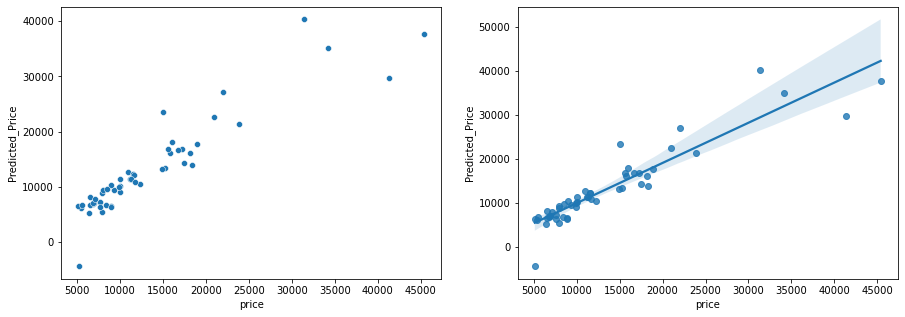

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x="price", y="Predicted_Price", data=test_predict)

plt.subplot(1,2,2)
sns.regplot(x="price", y="Predicted_Price", data=test_predict)

# Lasso Regression


In [37]:
from  sklearn.linear_model import Lasso

#Testing different alpha values for the L1 regularization
alpha_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in alpha_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

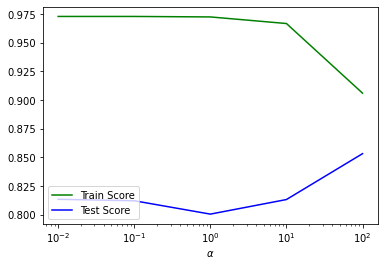

In [38]:
#Comparing different alpha values to see which produces the best scores
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(alpha_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [39]:
lasso = Lasso(100)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.9059192549083454
0.8531036947308047


      price  Predicted_Price
0    6795.0          6421.84
1   15750.0         20742.06
2   15250.0         16368.00
3    5151.0          6639.96
4    9995.0         10627.94
5   11199.0         14663.69
6    5389.0          6550.98
7    7898.0          6787.00
8   17199.0         21332.42
9    6529.0          6756.41
10  20970.0         22228.31
11  31400.5         33505.81
12  10945.0         13701.62
13  18344.0         13764.17
14   8916.5          7059.26


<AxesSubplot:xlabel='price', ylabel='Predicted_Price'>

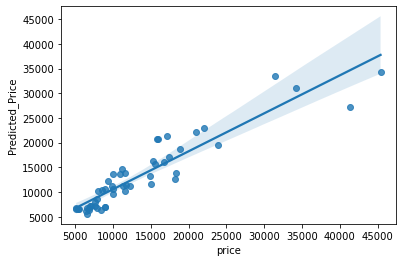

In [40]:
#Lasso Regression Prediction
test_predict = lasso.predict(X_test)
test_predict = pd.DataFrame(test_predict,columns=['Predicted_Price'])
test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)
y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index', axis = 1)
test_predict = pd.concat([y_test_index, test_predict], axis = 1)
print(test_predict.head(15))
sns.regplot(x="price", y="Predicted_Price", data=test_predict)

# Further Analysis utilizing Cross Validation


In [44]:
#Re-show X and y (y = price, X = all other variables from df_cars)
print(X.shape)
X.head()

(205, 65)


,wheelbase,enginesize,curbweight,carlength,carwidth,boreratio,stroke,horsepower,avgmpg,alfa-romero,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,130,2548,168.8,64.1,3.47,2.68,111,24.0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,130,2548,168.8,64.1,3.47,2.68,111,24.0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,152,2823,171.2,65.5,2.68,3.47,154,22.5,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,109,2337,176.6,66.2,3.19,3.40,102,27.0,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,136,2824,176.6,66.4,3.19,3.40,115,20.0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Scale the X dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
print(y.shape)
y[:5]

(205,)


0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [47]:
#K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

nn_list = list(range(1,51))

param_grid = {'n_neighbors': nn_list}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled, y)
print(grid_search.score(X_scaled,y))
print("Best parameters: {}".format(grid_search.best_params_))

0.729043243182218
Best parameters: {'n_neighbors': 23}


In [48]:
knn_reg = KNeighborsRegressor(n_neighbors=23)
knn_reg.fit(X_scaled, y)
knn_reg.score(X_scaled, y)

0.729043243182218

# Lasso

In [50]:
param_grid = {'alpha': [0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_scaled, y)
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 100}


In [51]:
lasso = Lasso(alpha=100)
lasso.fit(X_scaled, y)
lasso.score(X_scaled, y)

0.897540174643527